In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

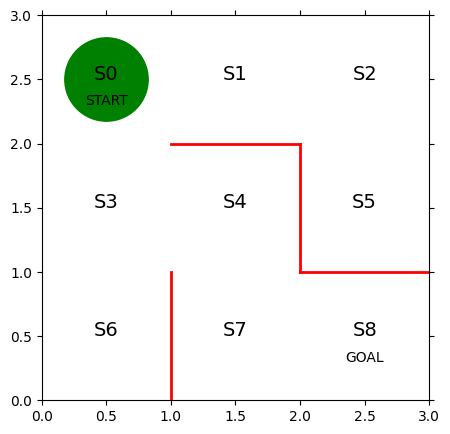

In [3]:
# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# 赤い壁を描く
ax.plot([1, 1], [0, 1], color='red', linewidth=2)
ax.plot([1, 2], [2, 2], color='red', linewidth=2)
ax.plot([2, 2], [2, 1], color='red', linewidth=2)
ax.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
ax.text(0.5, 2.5, 'S0', size=14, ha='center')
ax.text(1.5, 2.5, 'S1', size=14, ha='center')
ax.text(2.5, 2.5, 'S2', size=14, ha='center')
ax.text(0.5, 1.5, 'S3', size=14, ha='center')
ax.text(1.5, 1.5, 'S4', size=14, ha='center')
ax.text(2.5, 1.5, 'S5', size=14, ha='center')
ax.text(0.5, 0.5, 'S6', size=14, ha='center')
ax.text(1.5, 0.5, 'S7', size=14, ha='center')
ax.text(2.5, 0.5, 'S8', size=14, ha='center')
ax.text(0.5, 2.3, 'START', ha='center')
ax.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [4]:
# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])
theta_0

array([[nan,  1.,  1., nan],
       [nan,  1., nan,  1.],
       [nan, nan,  1.,  1.],
       [ 1.,  1.,  1., nan],
       [nan, nan,  1.,  1.],
       [ 1., nan, nan, nan],
       [ 1., nan, nan, nan],
       [ 1.,  1., nan, nan]])

In [33]:
def simple_convert_into_pi_from_theta(theta):
    row, col = theta.shape
    pi = np.zeros((row, col))
    for i in range(0, row):
        # nansum: nanを除外した合計
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    return np.nan_to_num(pi)
    
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    row, col = theta.shape
    pi = np.zeros((row, col))
    exp_theta = np.exp(beta * theta)
    for i in range(0, row):
        # nansum: nanを除外した合計
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
    return np.nan_to_num(pi)

def update_theta(theta, pi, state_action_history):
    eta = 0.1
    total = len(state_action_history) - 1
    row, col = theta.shape
    delta_theta = theta.copy()
    for i in range(0, row):
        for j in range(0, col):
            if not np.isnan(theta[i, j]):
                # actionがiと同じものを取り出す
                state_action_i = [sa for sa in state_action_history if sa[0] == i]
                # actionがi、stateがjのものを取り出す
                state_action_ij = [sa for sa in state_action_history if sa == [i, j]]
                delta_theta[i, j] = (len(state_action_ij) + pi[i, j] * len(state_action_i)) / total
    return theta + eta * delta_theta

# pi_0 = simple_convert_into_pi_from_theta(theta_0)
# new_theta = update_theta(theta_0, pi_0, state_action_history)
# pi = softmax_convert_into_pi_from_theta(new_theta)
# pi

In [34]:
def get_next_state(pi, state):
    direction = ["up", "right", "down", "left"]
    next_direction = np.random.choice(direction, p=pi[state, :])
    if next_direction == "up":
        state_next = state - 3
    elif next_direction == "right":
        state_next = state + 1
    elif next_direction == "down":
        state_next = state + 3
    elif next_direction == "left":
        state_next = state - 1
    return state_next

def get_action_and_next_state(pi, state):
    direction = ["up", "right", "down", "left"]
    next_direction = np.random.choice(direction, p=pi[state, :])
    if next_direction == "up":
        action = 0
        state_next = state - 3
    elif next_direction == "right":
        action = 1
        state_next = state + 1
    elif next_direction == "down":
        action = 2
        state_next = state + 3
    elif next_direction == "left":
        action = 3
        state_next = state - 1
    return action, state_next
    
def goal_maze(pi):
    state = 0
    state_history = [0]
    while True:
        next_state = get_next_state(pi, state)
        state_history.append(next_state)
        if next_state == 8:
            break
        else:
            state = next_state
    return state_history

# ゴールまで探索する関数
def goal_maze_ret_state_and_action(pi):
    state = 0
    state_history = [[0, np.nan]]
    while True:
        action, next_state = get_action_and_next_state(pi, state)
        state_history[-1][1] = action
        state_history.append([next_state, np.nan])
        if next_state == 8:
            break
        else:
            state = next_state
    return state_history    

In [37]:
stop_epsilon = 10 ** -2
theta = theta_0
pi = simple_convert_into_pi_from_theta(theta)

print(theta)
print(pi)

count = 1

while True:
    state_action_history = goal_maze_ret_state_and_action(pi)
    new_theta = update_theta(theta, pi, state_action_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)

    diff = np.sum(np.abs(new_pi - pi))
    print(diff)
    print(f"total step num: {len(state_action_history)}")
    
    if diff < stop_epsilon:
        break
    else:
        theta = new_theta
        pi = new_pi


[[nan  1.  1. nan]
 [nan  1. nan  1.]
 [nan nan  1.  1.]
 [ 1.  1.  1. nan]
 [nan nan  1.  1.]
 [ 1. nan nan nan]
 [ 1. nan nan nan]
 [ 1.  1. nan nan]]
[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]
0.010021932754255669
total step num: 93
0.005487231241025736
total step num: 269


In [27]:
from matplotlib import animation
from IPython.display import HTML

# state_history = goal_maze(pi_0)
# state_history = goal_maze_ret_state_and_action(pi_0)

# print(f"state history: {state_history}")
# print(f"step num: {len(state_history)}")


def init():
    line.set_data([], [])
    return line,

def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return line,

# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)
# HTML(anim.to_jshtml())

state history: [[0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 3], [3, 0], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
step num: 35


TypeError: unsupported operand type(s) for %: 'list' and 'int'